#### Ex 2) Parte I
Uma indústria dispões de 3 recursos, matéria-prima, mão de obra e tempo de maquinário, em quantidades limitadas.
Com esses recursos, a indústria pretende produzir dois produtos, 1 e 2. O quadro dá a utilização de cada recurso
em cada um dos produtos e a disponibilidade de cada recurso.

A indústria sabe que cada unidade produzida do produto A dá um lucro de 5,00 Reais e do produto B um lucro de 6,00 Reais.

***Premissa:*** Maximizar o lucro

#### Processo de Modelagem
##### 1) Variáveis de Decisão:

*Generalizado:*
Variável de Decisão:
* $x_i$: Quantidade unitária do produto ***i*** a ser produzida

Índices
* $i$: Produto do tipo *i*
* $j$: Recurso *j* consumido para produzir uma unidade do produto do tipo *i*

Extensão dos Conjuntos dos Índices
* $n$: Tipos diferentes de produtos considerados
* $m$: Quantidade de recursos necessários para produzir os produto considerados

*Aplicado ao Problema:*
* $x_1$: Quantidade unitária do produto ***1*** a ser produzida
* $x_2$: Quantidade unitária do produto ***2*** a ser produzida


#### 2) Parâmetros
***Consumo de Recursos***

*Generalizado*
* $CONSUMO_{ij}$: consumo em unitário do recurso *j* para a produção de uma unidade do produto *i*

*Aplicado ao Problema*
* $CONSUMO_{11}$: consumo unitário do recurso 1 para produzir uma unidade do produto *1*
* $CONSUMO_{12}$: consumo unitário do recurso 2 para produzir uma unidade do produto *1*
* $CONSUMO_{13}$: consumo unitário do recurso 3 para produzir uma unidade do produto *1*
* $CONSUMO_{21}$: consumo unitário do recurso 1 para produzir uma unidade do produto *2*
* $CONSUMO_{22}$: consumo unitário do recurso 2 para produzir uma unidade do produto *2*
* $CONSUMO_{23}$: consumo unitário do recurso 3 para produzir uma unidade do produto *2*

***Preços***
*Generalizado*
* $LUCRO_i$: lucro por venda de uma unidade do produto $i$

*Aplicado ao Problema*
* $LUCRO_1$: lucro por venda de uma unidade do produto *1*, R\$ 5,00/un
* $LUCRO_2$: lucro por venda de uma unidade do produto *2*, R\$ 6,00/un


***Disponibilidade de Recursos***
*Generalizado*
* $DISPONIBILIDADE_j$: disponibilidade do recurso *j*

*Aplicado ao Problema*
* $DISPONIBILIDADE_1$: disponibilidade de matéria-prima, 14 un
* $DISPONIBILIDADE_2$: disponibildiade de mão-de-obra, 9 un
* $DISPONIBILIDADE_3$: disponibildiade de tempo de maquinário, 56 un


****IMPORTANTE:*** Daqui em diante a modelagem será apresentada na forma *generalizada* devido à extensão dos problemas.


#### 3) Função Objetivo

***Objetivo:*** Maximizar o lucro

*Função Objetivo - Generalizada:*

$$ max \, Z = \sum_{i = 1} ^{n} LUCRO_i x_i $$


#### 4) Restrições
***Restrições Generalizadas***

1) Restrição de disponibilidade do recurso *j* por mês

\begin{gathered}
\begin{aligned}
&\sum_{i=1}^{n}\sum_{j=1}^{m} CONSUMO_{ij} x_i \leq DISPONIBILIDADE_j &
\end{aligned}
\end{gathered}

2) Restrição de não-negatividade

\begin{aligned}
&\ x_i \geq 0
\end{aligned}


#### 5) Formulação Matemática Formal

$\displaystyle max \, Z = \sum_{i = 1} ^{n} LUCRO_i x_i $


$\displaystyle s.t. $

$\displaystyle\sum_{i=1}^{n}\sum_{j=1}^{m} CONSUMO_{ij} x_i \leq DISPONIBILIDADE_j $ $\,\,\,$ $\forall$ *i* $=1,...,n,$ $\,$ $\forall$ *j* $=1,...,m $

$\displaystyle\ x_i \geq 0$ $\,\,\,$ $\forall$ *i* $=1,...,n$

#### 6) Implementação Generalizada - gurobipy



In [1]:
# Importando gurobipy API
import gurobipy as gp

# Criando dados de recursos e parâmetros associados
recurso, disponibilidade = gp.multidict({
    "Matéria-prima": 14,
    "Mão-de-obra": 9,
    "Tempo de Maquinário": 56})

# Criando dados de lucro por tipo ração
tipoProduto, lucro = gp.multidict({
    "Tipo1": 5,
    "Tipo2": 6 })

# Criando relação de recursos demandados por tipo de produto
consumoRecursos = {
    ("Matéria-prima", "Tipo1"): 1,
    ("Matéria-prima", "Tipo2"): 2,
    ("Mão-de-obra", "Tipo1"): 1,
    ("Mão-de-obra", "Tipo2"):  1,
    ("Tempo de Maquinário", "Tipo1"): 7,
    ("Tempo de Maquinário", "Tipo2"):  4}

# Criando o modelo
m = gp.Model("Max Lucro Produção")

# Criando variáveis de decisão
Qt_tipoProd = m.addVars(tipoProduto, name = "Tipo de Produto")


Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07


In [2]:
# Criando restrições de disponibilidade
restrDisponib = m.addConstrs(((sum(consumoRecursos[j, i] * Qt_tipoProd[i] for i in tipoProduto) 
                     <= disponibilidade[j]) for j in recurso), name = 'Restrições de Disponibilidade de Recursos')


In [3]:
# Criando função objetivo
m.setObjective(Qt_tipoProd.prod(lucro), gp.GRB.MAXIMIZE)

# Otimizando o modelo
m.optimize()


Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x065eb2f8
Coefficient statistics:
  Matrix range     [1e+00, 7e+00]
  Objective range  [5e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+00, 6e+01]
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1000000e+31   4.875000e+30   1.100000e+01      0s
       2    5.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.000000000e+01


#### 7) Plano de Produção

In [4]:
# Valores das variáveis de decisão
x1 = m.x[0]
x2 = m.x[1]

x1 = round(x1, 0)
x2 = round(x2, 0)

print("Plano de Produção:\n")
print("Tipo de produto ser produzido e quantidade (un):")
print("Produto ", tipoProduto, ": ", x1, "; ", x2, sep = "")

# Valor da Função Objetivo
print("\nLucro Total: R$", round(m.objVal, 2))

Plano de Produção:

Tipo de produto ser produzido e quantidade (un):
Produto ['Tipo1', 'Tipo2']: 4.0; 5.0

Lucro Total: R$ 50.0


#### 8) Representação Gráfica

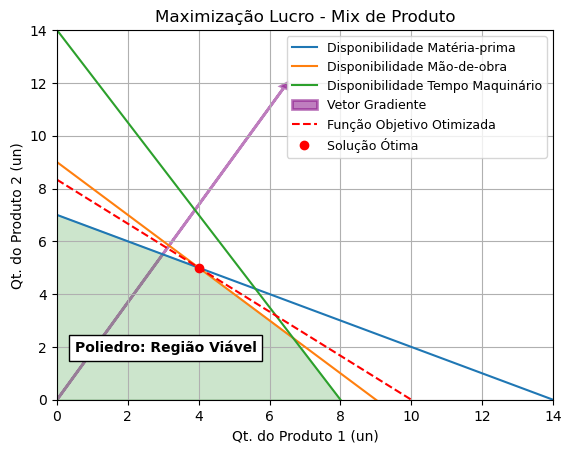

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo restrições
x = np.linspace(0, 120, 50)
y1 = (14-x)/2
y2 = (9-x)/1
y3 = (56-7*x)/4

# Plotando restriçõies
plt.plot(x, y1, label='Disponibilidade Matéria-prima')
plt.plot(x, y2, label='Disponibilidade Mão-de-obra')
plt.plot(x, y3, label='Disponibilidade Tempo Maquinário')

## Plotando o vetor gradiente
ax1 = 6.5
ax2 = 12

plt.arrow(0, 0, ax1, ax2, 
          length_includes_head=True, 
          head_width=0.2, 
          head_length=0.2, 
          color='purple', 
          label='Vetor Gradiente',
          alpha=0.5,
          linewidth=2)

# Plotando função objetivo otimizada
y7 = (50 - 5*x)/6
plt.plot(x, y7, label='Função Objetivo Otimizada', color='red', linestyle='--')

# Plotando a solução ótima
plt.plot(4, 5, 'ro', label='Solução Ótima')

# Plotando a reigão viável
x1 = [0, 0, 4, 6.7, 8]
x2 = [0, 7, 5, 2.3, 0]
plt.fill(x1, x2, color='green', alpha=0.2)

plt.text(0.5, 1.8, 
         'Poliedro: Região Viável', 
         fontsize=10, 
         fontweight='bold',
         bbox=dict(facecolor='white', alpha=1))

# Deifinindo os limites dos eixos x1 e x2
plt.xlim(0, 14)
plt.ylim(0, 14)

# Adicionando linha de grid e posição da legenda
plt.grid(True)
plt.legend(loc='upper right', fontsize=9)

# Criando títulos do eixos e do gráfico
plt.xlabel('Qt. do Produto 1 (un)')
plt.ylabel('Qt. do Produto 2 (un)')
plt.title('Maximização Lucro - Mix de Produto')

# Aprensetando a visualização do gráfico
plt.show()


**Ex 2) Parte II**

Insira, altere, ou exclua algum parâmetro ou restrição de tal forma que o problema se torne com solução infinita e indique essa mudança graficamente (faça outro gráfico).

**Proposição:**

* Remoção restrição de disponibilidade de tempo de maquinário
* Alteração restrição disponibilidade de matéria-prima para produção do produto 1
    * Não há limitação para que este produto seja produzido
* Alteração restrição disponibilidade de mão-de-obra para produção do produto 1
    * Não há limitação para que este produto seja produzido;



#### Representação Gráfica - Problema com múltiplas soluções

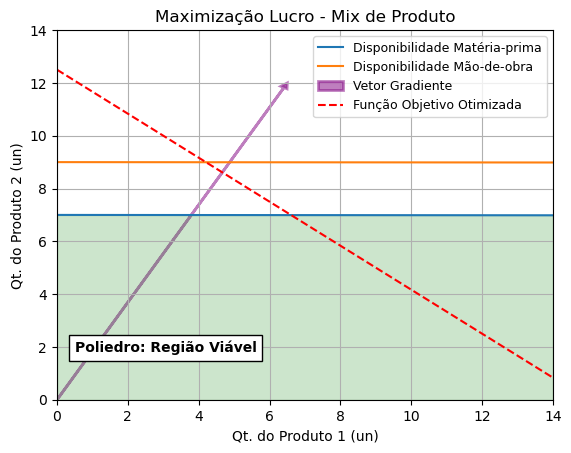

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo restrições
x = np.linspace(0, 120, 50)
y1 = 7-x/1000
y2 = 9-x/1000

# Plotando restriçõies
plt.plot(x, y1, label='Disponibilidade Matéria-prima')
plt.plot(x, y2, label='Disponibilidade Mão-de-obra')

## Plotando o vetor gradiente
ax1 = 6.5
ax2 = 12

plt.arrow(0, 0, ax1, ax2, 
          length_includes_head=True, 
          head_width=0.2, 
          head_length=0.2, 
          color='purple', 
          label='Vetor Gradiente',
          alpha=0.5,
          linewidth=2)

# Plotando função objetivo otimizada
y7 = (75 - 5*x)/6
plt.plot(x, y7, label='Função Objetivo Otimizada', color='red', linestyle='--')

# Plotando a reigão viável
x1 = [0, 0, 14, 14]
x2 = [0, 7, 7, 0]
plt.fill(x1, x2, color='green', alpha=0.2)

plt.text(0.5, 1.8, 
         'Poliedro: Região Viável', 
         fontsize=10, 
         fontweight='bold',
         bbox=dict(facecolor='white', alpha=1))

# Deifinindo os limites dos eixos x1 e x2
plt.xlim(0, 14)
plt.ylim(0, 14)

# Adicionando linha de grid e posição da legenda
plt.grid(True)
plt.legend(loc='upper right', fontsize=9)

# Criando títulos do eixos e do gráfico
plt.xlabel('Qt. do Produto 1 (un)')
plt.ylabel('Qt. do Produto 2 (un)')
plt.title('Maximização Lucro - Mix de Produto')

# Aprensetando a visualização do gráfico
plt.show()


***Observação:*** 
Note que com a alteração das restrições de disponibilidade de recursos, a restrição de mão-de-obra se tornou redundante. Além disso, com a remoção da restrição tempo de maquinário, apenas a restrição de matéria-prima limita a região de soluções possíveis para o problema. De qualquer forma, a representação gráfica indica que a função objetivo pode aumentar de forma ilimitada dada a ausência de uma restrição que não delimite a região viável ao longo da quantidade de produtos do tipo 1 a ser produzido. Sendo assim, o proprosição atual tornou este num problema de soluções irrestritas, com infintas soluções.